<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/AI_W11_14_04_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


<ipython-input-1-16dff706522e>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,10,i+1)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


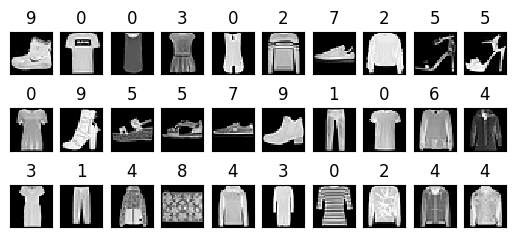

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

digit=x_train[9999]
plt.imshow(digit)

for i in range(30):
  plt.subplot(5,10,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

batch_size=64
epochs=20
classes=10

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))         #32 lần tích chập; kernal_size: kích thước bộ lọc
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [3]:
from keras.losses import categorical_crossentropy
from keras import losses
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)   #verbose=1: hiển thị quá trình học
model.save('model1.h5')

Epoch 1/20
938/938 [==============================] - 15s 4ms/step - loss: 0.4314 - accuracy: 0.8443
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2684 - accuracy: 0.9020
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2253 - accuracy: 0.9170
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1967 - accuracy: 0.9267
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1696 - accuracy: 0.9369
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1478 - accuracy: 0.9460
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1292 - accuracy: 0.9526
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1097 - accuracy: 0.9586
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0943 - accuracy: 0.9651
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0799 - accuracy: 0.970

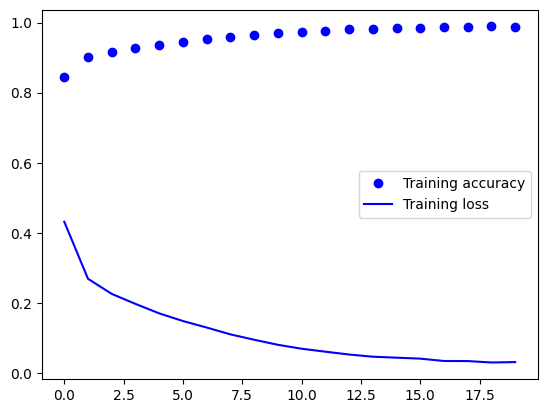

In [4]:
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()

In [5]:
from keras.datasets import cifar10
(x_train1,y_train1),(x_test1,y_test1)=cifar10.load_data()
print('x_train:', x_train1.shape)
print('y_train:', y_train1.shape)
print('x_test:', x_test1.shape)
print('y_test:', y_test1.shape)

x_train1=x_train1.reshape(50000,32,32,3)
x_train1=x_train1.astype('float32')/255
x_test1=x_test1.reshape(10000,32,32,3)
x_test1=x_test1.astype('float32')/255
print(x_train1.shape)
print(x_test1.shape)

y_train1=to_categorical(y_train1,10)
y_test1=to_categorical(y_test1,10)

170498071/170498071 [==============================] - 5s 0us/step
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
from keras.layers import Dropout,Activation
from keras.optimizers import SGD

#CNN
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3),padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(32,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64,(3,3),padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.25))

#ANN
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

sgd=SGD(lr=0.1,decay=1e-6,momentum=0.9,nesterov=True)
model1.compile(loss=losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
train1=model1.fit(x_train1,y_train1,batch_size=64,epochs=20,verbose=1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
782/782 [==============================] - 7s 7ms/step - loss: 2.1995 - accuracy: 0.1681
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.9899 - accuracy: 0.2662
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 1.8607 - accuracy: 0.3229
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 1.7404 - accuracy: 0.3653
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 1.6343 - accuracy: 0.4045
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 1.5451 - accuracy: 0.4383
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 1.4743 - accuracy: 0.4679
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4158 - accuracy: 0.4858
Epoch 9/20
782/782 [==============================] - 6s 7ms/step - loss: 1.3661 - accuracy: 0.5100
Epoch 10/20
782/782 [==============================] - 6s 7ms/step - loss: 1.3210 - accuracy: 0.5241

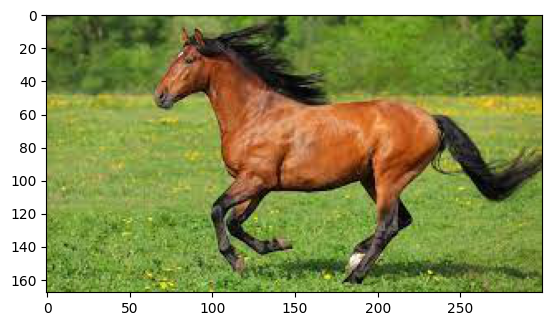

In [8]:
img=plt.imread('/111.jpg')
plt.imshow(img)
plt.show()

In [9]:
from keras.utils import load_img,img_to_array
import numpy as np

img=load_img('/111.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=-1)

1/1 [==============================] - 0s 232ms/step


array([7])

In [10]:
from os import listdir
from numpy import asarray,save 
#from keras.preprocessing.image import load_img,img_to_array 

folder='/content/drive/MyDrive/AI'
photos,labels=list(),list()
for file in listdir():
  output=0.0
  if file.startswith('NguyenDoanQuangNhat'):
    output=1.0
  if file.startswith('QuangNhat'):
    output=2.0
  photo=load_img(folder+file,target_size=(200,200))
  photo=img_to_array(photo)
  photos.append(photo)
  labels.append(output)
  photos=asarray(photos)
  labels=asarray(labels)
  print(photos.shape,labels.shape)
  save('/content/drive/MyDrive/Nhat_photos.npy',photos)
  save('/content/drive/MyDrive/Nhat_labels.npy',labels)

FileNotFoundError: ignored